In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RANSACRegressor

# Reading in Data

In [6]:
# Reading in Split dataset
sep_data = pd.read_csv('Data_Table_Complete_CSV_CLEAN.csv')
# Printing contents of dataset
sep_data.head()

,Scan_Height_mm,Scan_Height_Layers,mm_per_Layer_Height,Scan_Width_mm,Scan_Width_Layers,mm_per_Layer_Width,Scan_Depth_mm,Scan_Depth_Layers,mm_per_Layer_Depth
0,24.8,55,0.450909,21.7,395,0.054937,20.1,382,0.052618
1,26.3,46,0.571739,18.5,422,0.043839,19.0,379,0.050132
2,25.4,58,0.437931,20.4,409,0.049878,20.0,400,0.050000
3,25.3,36,0.702778,21.6,430,0.050233,18.4,362,0.050829
4,27.8,46,0.604348,21.9,365,0.060000,21.6,372,0.058065


In [5]:
# Reading in Full dataset
full_data = pd.read_csv('Data_Table_Complete_FULL_CSV_CLEAN.csv')
# Printing contents of dataset
full_data.head()

,Scan_Length_mm,Scan_Layers,mm_per_Layer
0,24.8,55,0.450909
1,26.3,46,0.571739
2,25.4,58,0.437931
3,25.3,36,0.702778
4,27.8,46,0.604348


# Multiple Linear Regression

### Works similarly to Simple Linear Regression but takes more than one predictor variable to predict a response.

## MLR_sep_data

In [19]:
#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
#y = sep_data[['mm_per_Layer_Height']]

x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [39]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [40]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [41]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  [1.49607271 0.06592774 0.05755798]
Coefficients:


[('Scan_Height_mm',
  array([ 0.04200334, -0.02369181,  0.00880814, -0.00341514, -0.05525467,
          0.00372622])),
 ('Scan_Height_Layers',
  array([ 3.00685562e-05, -7.13523137e-06,  2.34084915e-03, -1.50944222e-04,
          4.06411822e-05, -8.05076474e-06])),
 ('Scan_Width_mm',
  array([-3.63383842e-05,  2.66058222e-05, -2.18458146e-04,  2.17028448e-05,
          3.29050609e-03, -1.97917312e-04]))]

In [42]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
#print("Prediction for test set: {}".format(y_pred_mlr))
print(y_pred_mlr)

[[1.12524078 0.06470185 0.06403843]
 [0.48599071 0.06279591 0.06498716]]


In [43]:
print(y_test)

    mm_per_Layer_Height  mm_per_Layer_Width  mm_per_Layer_Depth
11             1.007407            0.064198            0.064452
9              0.497917            0.061875            0.064808


In [44]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 96.66
Mean Absolute Error: 0.021962789937813056
Mean Square Error: 0.0023380395572555703
Root Mean Square Error: 0.04835327866086818


## MLR_full_data

In [45]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [46]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [47]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [48]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.28818340851731533
Coefficients:


[('Scan_Length_mm', 0.017419325762011377),
 ('Scan_Layers', -0.0016796021661217696)]

In [49]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
#print("Prediction for test set: {}".format(y_pred_mlr))
print(y_pred_mlr)

[0.09580036 0.1329386  0.69517897 0.00273992]


In [50]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [51]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 81.18
Mean Absolute Error: 0.06060812834062725
Mean Square Error: 0.004108964304868068
Root Mean Square Error: 0.06410120361481575


# Decision Tree Regression

### Basically a decision tree that can be used to predict continuous valued outputs

## Decision_Trees_sep_data

In [84]:
#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
#y = sep_data[['mm_per_Layer_Height']]

x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [86]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [87]:
print(predictions)

[[0.86071429 0.06713483 0.06472303]
 [0.57560976 0.06582278 0.06409396]]


In [88]:
print(y_test)

    mm_per_Layer_Height  mm_per_Layer_Width  mm_per_Layer_Depth
11             1.007407            0.064198            0.064452
9              0.497917            0.061875            0.064808


In [91]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 97.66
Mean Absolute Error: 0.03870948366666668
Mean Square Error: 0.004596647414524741
Root Mean Square Error: 0.06779857973825662


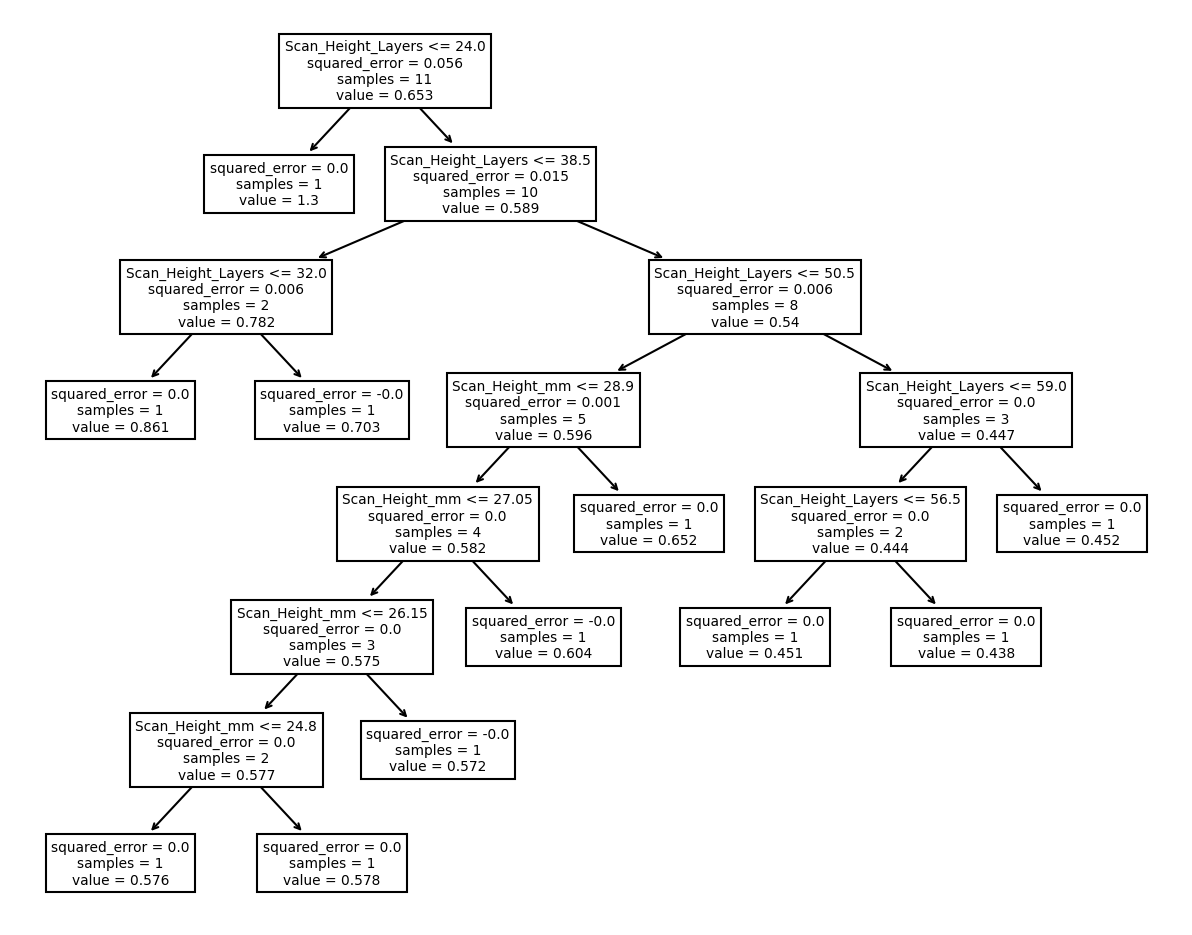

In [68]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=x.columns);

## Decision_Trees_full_data

In [92]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [94]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [95]:
print(predictions)

[0.06419753 0.06624204 0.57173913 0.05023256]


In [96]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [98]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.97
Mean Absolute Error: 0.010036125250000012
Mean Square Error: 0.00027251899039497157
Root Mean Square Error: 0.01650814921167638


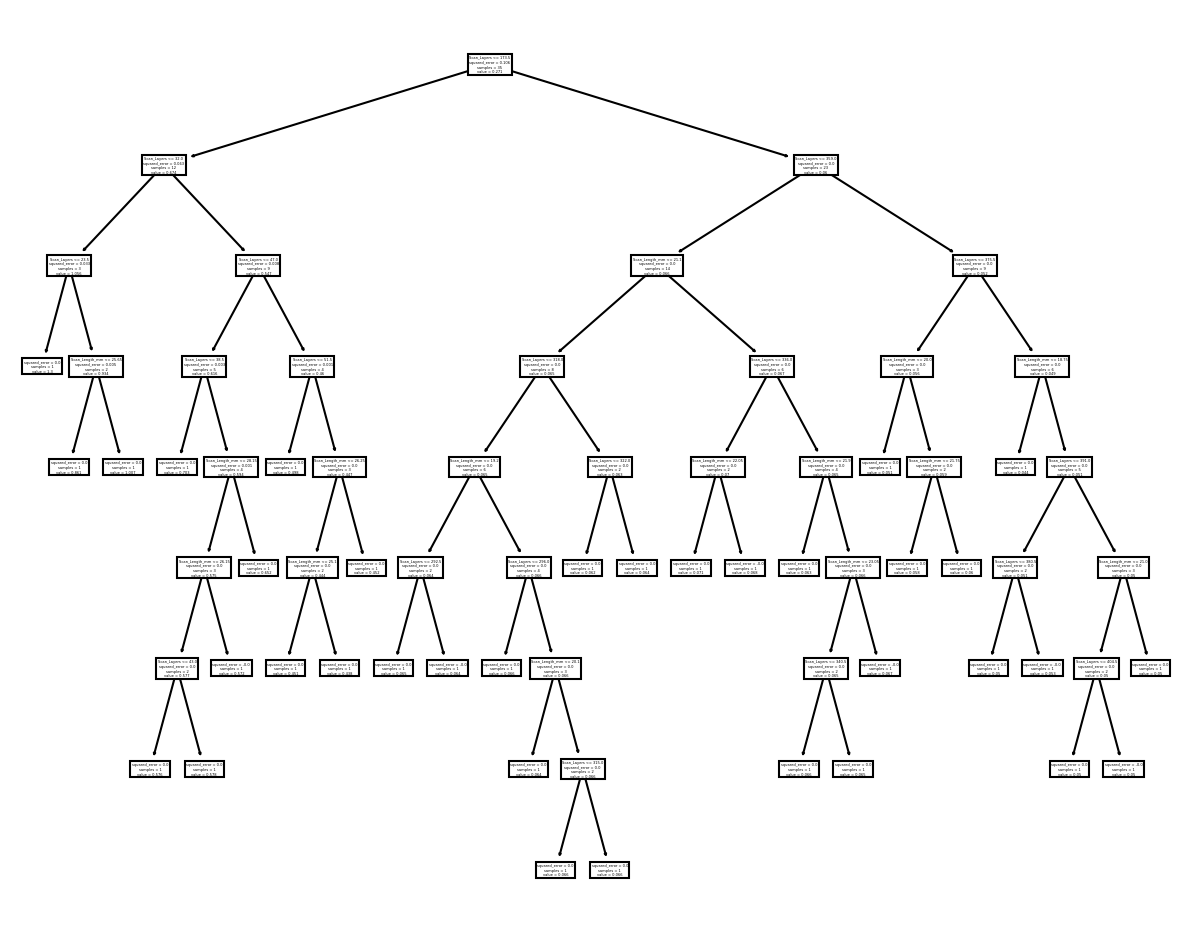

In [99]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=x.columns);

# Random Forest

## Random Forest_sep_data

In [107]:
#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
#y = sep_data[['mm_per_Layer_Height']]

x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [109]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf = rf.fit(X_train, y_train)

In [123]:
predictions = rf.predict(X_test)

In [124]:
print(predictions)

[0.063285   0.06627136 0.59813063 0.05298225]


In [125]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [117]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(rf.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.60
Mean Absolute Error: 0.047723043466666726
Mean Square Error: 0.006474569956776065
Root Mean Square Error: 0.08046471249421118


## Random Forest_full_data

In [126]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [128]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf = rf.fit(X_train, y_train)

In [129]:
predictions = rf.predict(X_test)

In [130]:
print(predictions)

[0.063285   0.06627136 0.59813063 0.05298225]


In [131]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [132]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(rf.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.18
Mean Absolute Error: 0.0025153638025001597
Mean Square Error: 1.107094318056938e-05
Root Mean Square Error: 0.003327302688450418


# Gradient Boosting

## Gradient Boosting_sep_data

In [134]:
x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
y = sep_data[['mm_per_Layer_Height']]

#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
#y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [135]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42) 

In [137]:
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, random_state = 42)
  
# Fit to training set
gbr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [138]:
# Predict on test set
predictions = gbr.predict(X_test)

In [139]:
print(predictions)

[0.83078139 0.57316581]


In [140]:
print(y_test)

    mm_per_Layer_Height
11             1.007407
9              0.497917


In [143]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(gbr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.14
Mean Absolute Error: 0.12593757985396606
Mean Square Error: 0.01842959177913266
Root Mean Square Error: 0.13575563258713305


## Gradient Boosting_full_data

In [144]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [145]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42) 

In [146]:
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, random_state = 42)
  
# Fit to training set
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [147]:
# Predict on test set
predictions = gbr.predict(X_test)

In [148]:
print(predictions)

[0.06390272 0.06713355 0.57525406 0.05193949]


In [149]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [150]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(gbr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.98
Mean Absolute Error: 0.008448223678601716
Mean Square Error: 0.00021455803511205424
Root Mean Square Error: 0.01464779966793833


# RANSAC

## RANSAC_sep_data

In [171]:
x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
y = sep_data[['mm_per_Layer_Height']]

#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
#y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [172]:
# Splitting the dataset into the Training data set and Testing data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=42)

In [173]:
# Initializing the model
ransac = RANSACRegressor()

# training the model
ransac.fit(X_train, y_train)

RANSACRegressor()

In [174]:
# inlier mask
inlier_mask = ransac.inlier_mask_

print(inlier_mask)

[ True  True  True  True  True  True  True  True False  True  True]


In [175]:
# inliers
inlier_mask = ransac.inlier_mask_

# for loop to count
count = 0
for i in inlier_mask:
    if i==False:
        count +=1

# printing
print("Total datapoints were : ", len(inlier_mask))
print("Total outliers detected  were : ", count)

Total datapoints were :  11
Total outliers detected  were :  1


In [176]:
# predicting
predictions = ransac.predict(X_test)

In [185]:
print(predictions)

[0.06270845 0.06656148 0.12757472 0.05526012]


In [186]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [177]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(ransac.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 78.85
Mean Absolute Error: 0.088124852035214
Mean Square Error: 0.0109063180576933
Root Mean Square Error: 0.10443331871435141


## RANSAC_full_data

In [187]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [188]:
# Splitting the dataset into the Training data set and Testing data set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=42)

In [189]:
# Initializing the model
ransac = RANSACRegressor()

# training the model
ransac.fit(X_train, y_train)

RANSACRegressor()

In [190]:
# inlier mask
inlier_mask = ransac.inlier_mask_

print(inlier_mask)

[ True  True False  True  True  True  True False  True False  True False
  True False  True False False False  True  True False  True  True False
  True  True  True False  True  True  True False  True  True  True]


In [191]:
# inliers
inlier_mask = ransac.inlier_mask_

# for loop to count
count = 0
for i in inlier_mask:
    if i==False:
        count +=1

# printing
print("Total datapoints were : ", len(inlier_mask))
print("Total outliers detected  were : ", count)

Total datapoints were :  35
Total outliers detected  were :  12


In [192]:
# predicting
predictions = ransac.predict(X_test)

In [193]:
print(predictions)

[0.06270845 0.06656148 0.12757472 0.05526012]


In [194]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [195]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, predictions)
meanSqErr = metrics.mean_squared_error(y_test, predictions)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('R squared: {:.2f}'.format(ransac.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: -16.22
Mean Absolute Error: 0.11952991269433706
Mean Square Error: 0.0568283058105203
Root Mean Square Error: 0.2383868826309877
